# Random Walkers in the Fog: Extension to 2–9 Walkers
This notebook extends the **Class 7** model of two random walkers on a ring to **multiple walkers** (2 to 9).

For each combination of:
- number of walkers $n \in \{2,\ldots,9\}$
- ring circumference $L \in \{10,20,\ldots,300\}$

we run *100 independent trials* and record the total time‐steps until **any two walkers meet**.

We then explore how the **mean** and **standard deviation** of the meeting time scale with $L$ on a log–log plot.

In [1]:
from random import choice
from collections import defaultdict
import numpy as np
from statistics import mean, stdev
import matplotlib.pyplot as plt
from tqdm.auto import tqdm


/opt/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class FogRandomWalkSimulation:
    """Simulate multiple random walkers on a ring until any two collide."""

    def __init__(self, n_walkers: int, L: int):
        self.n = n_walkers
        self.L = L

    def _step(self, positions):
        """Advance each walker by −1, 0, or +1 (mod L)."""
        for i in range(self.n):
            positions[i] = (positions[i] + choice([-1, 0, 1])) % self.L
        return positions

    def run_once(self):
        """Run a single trial; return steps taken until first meeting."""
        # Start walkers equally spaced to avoid immediate collision
        positions = [(i * self.L // self.n) for i in range(self.n)]
        steps = 0
        while len(set(positions)) == self.n:
            positions = self._step(positions)
            steps += 1
        return steps

    def run_trials(self, n_trials: int = 100):
        """Run multiple trials; return list of meeting times."""
        return [self.run_once() for _ in range(n_trials)]


In [3]:
# Parameters
n_trials = 100
L_values = list(range(10, 301, 10))
walker_counts = list(range(2, 10))  # 2–9 walkers

results = defaultdict(lambda: {'mean': [], 'stdev': []})

for n in tqdm(walker_counts, desc='Walker counts'):
    for L in tqdm(L_values, leave=False, desc=f'n={n}'):
        sim = FogRandomWalkSimulation(n, L)
        times = sim.run_trials(n_trials)
        results[n]['mean'].append(mean(times))
        results[n]['stdev'].append(stdev(times))

# Convert to numpy arrays for convenience
for n in walker_counts:
    results[n]['mean'] = np.array(results[n]['mean'])
    results[n]['stdev'] = np.array(results[n]['stdev'])


Walker counts: 100%|██████████| 8/8 [00:17<00:00,  2.19s/it]


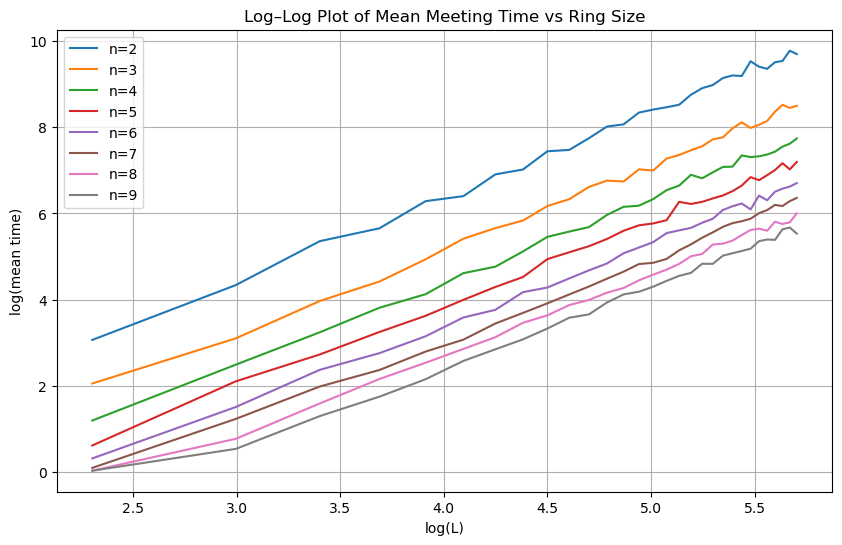

In [4]:
plt.figure(figsize=(10, 6))
for n in walker_counts:
    plt.plot(np.log(L_values), np.log(results[n]['mean']), label=f'n={n}')
plt.title('Log–Log Plot of Mean Meeting Time vs Ring Size')
plt.xlabel('log(L)')
plt.ylabel('log(mean time)')
plt.legend()
plt.grid(True)
plt.show()


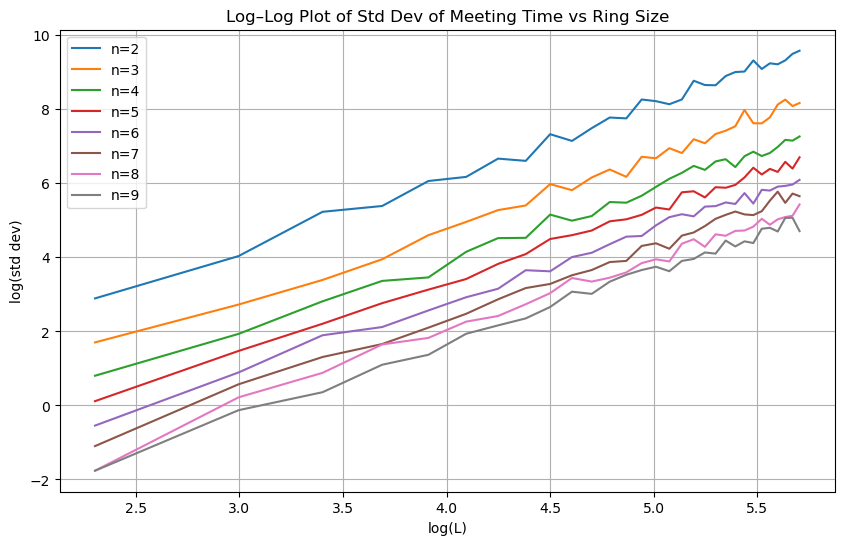

In [5]:
plt.figure(figsize=(10, 6))
for n in walker_counts:
    plt.plot(np.log(L_values), np.log(results[n]['stdev']), label=f'n={n}')
plt.title('Log–Log Plot of Std Dev of Meeting Time vs Ring Size')
plt.xlabel('log(L)')
plt.ylabel('log(std dev)')
plt.legend()
plt.grid(True)
plt.show()


## Observations
1. **Scaling behavior** – On a log–log scale the curves are approximately linear, suggesting a power‑law relationship between ring size $L$ and the expected meeting time.
2. **Effect of walker count** – As the number of walkers increases, collisions occur sooner, so the mean meeting time curve shifts downward.
3. **Dispersion** – The standard deviation follows a similar trend to the mean, indicating that relative variability stays roughly constant for each $n$.